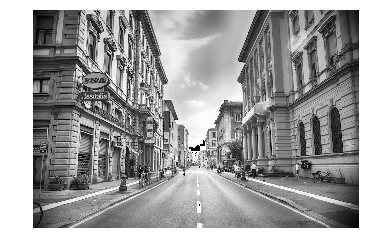

In [9]:
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

input_pixels = np.array(rgb2gray(imread('resources/city.jpg'))*256, dtype=np.uint8)
plt.axis("off")
plt.imshow(input_pixels, cmap="gray")

The operator uses two 3×3 kernels which are convolved with the original image to calculate approximations of the derivatives – one for horizontal changes, and one for vertical. If we define A as the source image, and Gx and Gy are two images which at each point contain the horizontal and vertical derivative approximations respectively, the computations are as follows:

In [10]:
kernel_horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype = np.float)
kernel_vertical   = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype = np.float)

In [11]:
from scipy import signal

Gx = signal.convolve2d(input_pixels, kernel_horizontal, boundary='symm', mode='same')
Gy = signal.convolve2d(input_pixels, kernel_vertical, boundary='symm', mode='same')

In [17]:
gradient_magnitude = np.sqrt(Gx * Gx + Gy * Gy)
gradient_magnitude *= 255.0 / np.max(gradient_magnitude)

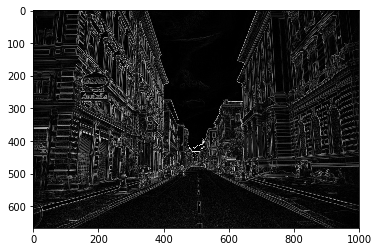

In [18]:
plt.imshow(gradient_magnitude, cmap="gray")